# Trending YouTube Content Exploratory Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#import">Importing libraries and data</a></li>
    <li><a href="#assess">Assess the data</a></li>
        <ul>
            <li><a href="#assess_sum">Assessment summary</a></li>
        </ul>
    <li><a href="#clean">Clean the data</a></li>
        <ul>
            <li><a href="clean_sum">Cleaning summary</a></li>
        </ul>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The purpose of this analysis is to analyze the YouTube trending content in the US. Here are the questions I am looking to answer:
- What types of videos appear in trending content most often? How has that changed over time?
- Are there particular days/times videos were posted that affect top video performance?
- How long does it take for a video to become trending typically?
- Is there a threshold for the amount of engagement/other statistic to become trending?
- What creators have had the most success in consistently publishing trending video? Why is that?
- Are there common themes in best practices (titles, descriptions, tags) amongst trending content?

<a id='wrangling'></a>
## Data Wrangling

<a id='import'></a>
### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv file of trending YouTube video data
videos = pd.read_csv(r"/Users/baka_brooks/Documents/udacity-projects/youtube-trending/datasets/USvideos.csv")

In [3]:
# Read json file of US video categories
import json
from pandas.io.json import json_normalize

data = pd.read_json(r"/Users/baka_brooks/Documents/udacity-projects/youtube-trending/datasets/US_category_id.json")

category_id = []
category = []
for item in data['items']:
    category_id.append(item['id'])
    category.append(item['snippet']['title'])
    
categories = pd.DataFrame(list(zip(category_id, category)), columns=['category_id', 'category'])
categories['category_id'] = categories['category_id'].astype('int64')
categories = categories.sort_values('category_id')

<a id='assess'></a>
### Assess the data

In [4]:
videos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


- Tags separated by "|" character
- Description also contains special characters
- Trending date and published time columns are in different formats, and both are not the format needed for analysis

In [5]:
videos.shape

(40949, 16)

- There are 40,949 videos included in this dataset and 16 columns

In [6]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


- There are some null descriptions

In [7]:
videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

- Dates and times are read as strings

In [8]:
videos.duplicated().sum()

48

- There are 48 duplicate rows in the dataset.

In [9]:
videos.video_id.nunique()

6351

- There are 40K+ rows in the dataset, but there are 6,351 unique videos featured.

In [10]:
videos.video_id.value_counts().head()

j4KvrAUjn6c    30
QBL8IRJ5yHU    29
iILJvqrAQ_w    29
8h--kFui1JA    29
MAjY8mCTXWk    29
Name: video_id, dtype: int64

- The most common `video_id` is "j4KvrAUjn6c". Let's examine these rows to see the differences between these rows.

In [11]:
videos[videos['video_id'] == 'j4KvrAUjn6c']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34550,j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...
34752,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34966,j4KvrAUjn6c,18.16.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",4862649,90451,14792,18035,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35180,j4KvrAUjn6c,18.17.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",5665445,101461,16170,19395,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35396,j4KvrAUjn6c,18.18.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6290796,110373,17131,20365,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35600,j4KvrAUjn6c,18.19.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6773604,116508,17787,20941,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35804,j4KvrAUjn6c,18.20.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7204004,121673,18323,21459,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36035,j4KvrAUjn6c,18.21.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7512530,125317,18633,21812,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36245,j4KvrAUjn6c,18.22.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7740671,128377,18901,22052,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...


- The non-duplicate rows that are of the same video vary in trending date.

In [12]:
categories.head(5)

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


- Some categories appear to be missing in the dataset

In [13]:
categories.dtypes

category_id     int64
category       object
dtype: object

In [14]:
categories.category.value_counts()

Comedy                   2
Entertainment            1
Science & Technology     1
Foreign                  1
Sports                   1
Sci-Fi/Fantasy           1
Shows                    1
Education                1
Pets & Animals           1
Music                    1
Film & Animation         1
Anime/Animation          1
Action/Adventure         1
Movies                   1
Travel & Events          1
Gaming                   1
Nonprofits & Activism    1
Howto & Style            1
Thriller                 1
People & Blogs           1
Short Movies             1
Autos & Vehicles         1
News & Politics          1
Shorts                   1
Drama                    1
Documentary              1
Family                   1
Trailers                 1
Horror                   1
Classics                 1
Videoblogging            1
Name: category, dtype: int64

In [15]:
categories.query('category == "Comedy"')

,category_id,category
10,23,Comedy
21,34,Comedy


<a id='assess_sum'></a>
**Assessment summary**
1. The `trending_date` and `publish_time` columns are strings and will need to be converted to datetime objects.
2. The `trending_date` column is in the wrong format to be read as a datetime object.
3. The `publish_time` column includes both date and time. In order to provide more segmented time-based analysis, date and time will be split into separate columns.
4. There are 48 duplicate rows in the dataset. These rows will be removed.
5. Merge the two DataFrames on `category_id`.
6. There are gaps between the category id numbers. Monitor this when merging dataframes to determine if any additional data needs to be collected.
7. There are two "Comedy" categories. This will need to be assessed after merging the DataFrames to be sure that there is not mis-classification.
8. Rename the `comment_count` column to `columns`, for consistency and ease of analysis.
9. Of the 40K+ videos featured in the dataset, there are 6,351 unique videos. The other rows represent different dates in which the video was trending. A separate DataFrame will be created after merging the video categories in order to analyze individual videos based on the first date they were trending.

<a id='clean'></a>
### Clean the data

In [16]:
videos_clean = videos.copy()
categories_clean = categories.copy()

1. The `trending_date` and `publish_time` columns are strings and will need to be converted to datetime objects.   
For the purposes of this analysis, I will only need to change the data types of the date and time columns.

2. The `trending_date` column is in the wrong format to be read as a datetime object.   
The `trending_date` column is currently in an unreadable date format, so I will need to get the data into a suitable format first.

In [17]:
videos_clean["publish_time"] = pd.to_datetime(videos_clean["publish_time"])
videos_clean.dtypes

video_id                               object
trending_date                          object
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object

In [18]:
videos_clean.trending_date.value_counts()

17.24.12    200
17.30.12    200
18.30.01    200
17.12.12    200
18.21.05    200
           ... 
18.31.01    197
18.01.02    197
18.03.02    196
18.02.02    196
18.04.02    196
Name: trending_date, Length: 205, dtype: int64

- By observation, all of the records are in the yy.dd.mm format, so I will parse the date this way across the entire column. 

In [19]:
(videos_clean.publish_time.min(), videos_clean.publish_time.max())

(Timestamp('2006-07-23 08:24:11+0000', tz='UTC'),
 Timestamp('2018-06-14 01:31:53+0000', tz='UTC'))

- The dataset ranges from the years 2006 to 2018, so I will concatenate "20" to the year of the cleaned trending date.

In [20]:
videos_clean["trending_date"] = videos_clean.trending_date.str.split(".")

In [21]:
date = []
for x in videos_clean.trending_date:
    year = "20" + x[0]
    day = x[1]
    month = x[2]
    date.append(year + "-" + month + "-" + day)

videos_clean["trending_date"] = date

In [22]:
videos_clean["trending_date"] = pd.to_datetime(videos_clean["trending_date"])

In [23]:
videos_clean.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object

3. The `publish_time` column includes both date and time. In order to provide more segmented time-based analysis, date and time will be split into separate columns.   
I will split the `publish_time` column to separate date and time to perform separate time series analyses.

In [24]:
videos_clean['publish_date'] = videos_clean['publish_time'].dt.date
videos_clean['publish_time_new'] = videos_clean['publish_time'].dt.time
videos_clean.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time_new
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00


In [25]:
videos_clean.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
publish_date                           object
publish_time_new                       object
dtype: object

- The `publish_date` and `publish_time_new` columns were created as strings and need to be converted back to datetime obejcts.

In [29]:
videos_clean['publish_date'] = pd.to_datetime(videos_clean['publish_date'])
videos_clean['publish_time_new'] = pd.to_timedelta(videos_clean['publish_time_new'])
videos_clean.dtypes

ValueError: Invalid type for timedelta scalar: <class 'datetime.time'>

In [30]:
videos_clean.publish_time_new.value_counts()

14:00:03    250
16:00:03    224
14:00:04    215
14:00:01    213
05:00:01    210
           ... 
16:01:35      1
06:14:25      1
04:15:27      1
01:19:44      1
12:22:20      1
Name: publish_time_new, Length: 4478, dtype: int64

- Drop the original `publish_time` column and rename the new time column

In [31]:
videos_clean = videos_clean.drop(columns='publish_time', axis=1)
videos_clean = videos_clean.rename(columns={'publish_time_new': 'publish_time'})
videos_clean.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00


4. There are 48 duplicate rows in the dataset. These rows will be removed.   
This will be done using the `.drop_duplicates()` method.

In [32]:
videos_clean = videos_clean.drop_duplicates()
videos_clean.shape

(40901, 17)

In [33]:
videos_clean.duplicated('video_id').sum()

34550

5. Merge the two DataFrames on `category_id`.
6. There are gaps between the category id numbers. Monitor this when merging dataframes to determine if any additional data needs to be collected.
7. There are two "Comedy" categories. This will need to be assessed after merging the DataFrames to be sure that there is not mis-classification. <br>
Merge the DataFrames first, then assess effect on categorization and clean further if necessary.

In [34]:
# Merge DataFrames
df1 = videos_clean.merge(categories_clean, on='category_id', how='left')
df1.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,Entertainment


In [35]:
df1.groupby(['category_id', 'category'])['video_id'].count()

category_id  category             
1            Film & Animation         2343
2            Autos & Vehicles          384
10           Music                    6467
15           Pets & Animals            920
17           Sports                   2172
19           Travel & Events           401
20           Gaming                    816
22           People & Blogs           3208
23           Comedy                   3453
24           Entertainment            9944
25           News & Politics          2485
26           Howto & Style            4142
27           Education                1655
28           Science & Technology     2397
29           Nonprofits & Activism      57
43           Shows                      57
Name: video_id, dtype: int64

- There were no NaN values created in the `category` column as a result of the left join, so all videos were classified appropriately. Only one 'Comedy' category was needed.

8. Rename the `comment_count` column to `columns`, for consistency and ease of analysis.
I am also going to rename the "comment_count" column to "comments", just for my own sanity.

In [36]:
df1 = df1.rename(columns={"comment_count": "comments"})
df1.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comments,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,Entertainment


9. Of the 40K+ videos featured in the dataset, there are 6,351 unique videos. The other rows represent different dates in which the video was trending. A separate DataFrame will be created after merging the video categories in order to analyze individual videos based on the first date they were trending. <br>
I will need to find the `video_id` of all videos that trended on multiple days, find the day they were first trending, and create a DataFrame comprised of individual videos with the `trending_date` and associated stats of the day they first appeared in the trending section.

In [37]:
df1.video_id.value_counts()

8h--kFui1JA    29
j4KvrAUjn6c    29
QBL8IRJ5yHU    28
iILJvqrAQ_w    28
YI3tsmFsrOg    28
               ..
VRHhT9f6e0k     1
0-_h-qFt_zs     1
qLoqdxFqT9A     1
pzPtlmzwajA     1
q-WipZ9p0wk     1
Name: video_id, Length: 6351, dtype: int64

- The new DataFrame must filter out the duplicate videos, leaving only the row of the first trending date.

In [38]:
df2 = df1.sort_values('trending_date').drop_duplicates('video_id', keep='last')
df2.shape

(6351, 18)

In [39]:
df2.sort_values('video_id')

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comments,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time,category
40160,-0CMnp02rNY,2018-06-11,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,423,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,2018-06-04,13:00:00,Entertainment
15457,-0NYY8cqdiQ,2018-02-01,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,24,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,94,https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg,False,False,False,Ellen and Megan Mullally have known each other...,2018-01-29,14:00:39,Entertainment
31992,-1Hm41N0dUs,2018-05-01,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,1484,https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg,False,False,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",2018-04-27,07:30:02,Comedy
3711,-1yT-K3c6YI,2017-12-02,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,22,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,846,https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg,False,False,False,Check out the video we did on the Merrell Twin...,2017-11-28,18:30:43,People & Blogs
584,-2RVw2_QyxQ,2017-11-16,2017 Champions Showdown: Day 3,Saint Louis Chess Club,27,"Chess|""Saint Louis""|""Club""",71089,460,27,20,https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg,False,False,False,The Saint Louis Chess Club hosts a series of f...,2017-11-12,02:39:01,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28342,zwEn-ambXLw,2018-04-06,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,"travis wall|""shoshana bean""|""greatest showman""...",241668,8478,144,328,https://i.ytimg.com/vi/zwEn-ambXLw/default.jpg,False,False,False,I was lucky enough to lay the original demo fo...,2018-03-22,08:30:07,Music
1183,zxUwbflE1SY,2017-11-19,100 People Hold Their Breath for as Long as Th...,Cut,24,"breath|""hold""|""funny""|""holding breath""|""breath...",225280,5770,150,1312,https://i.ytimg.com/vi/zxUwbflE1SY/default.jpg,False,False,False,Get Cut swag here: http://cut.com/shop\n\nDon’...,2017-11-13,13:00:10,Entertainment
36896,zxwfDlhJIpw,2018-05-25,kanye west / charlamagne interview,Kanye West,22,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8442986,166520,19462,48467,https://i.ytimg.com/vi/zxwfDlhJIpw/default.jpg,False,False,False,NaN,2018-05-01,15:57:06,People & Blogs
144,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,2017-11-09,09:00:07,Entertainment


In [40]:
df2.video_id.nunique()

6351

- Now I will do a final check of data to be sure cleaning is complete.

In [41]:
df1.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comments                           int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
publish_date              datetime64[ns]
publish_time                      object
category                          object
dtype: object

In [42]:
df2.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comments                           int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
publish_date              datetime64[ns]
publish_time                      object
category                          object
dtype: object

- `publish_date` and `publish_time` need to be converted to datetime objects again in both dataframes

In [43]:
df2['publish_date'] = pd.to_datetime(df2['publish_date'])
df2.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comments                           int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
publish_date              datetime64[ns]
publish_time                      object
category                          object
dtype: object

<a id='clean_sum'></a>
**Cleaning summary**
1. The date/time based columns were converted to datetime objects from strings using `pd.to_datetime()`.
2. The `trending_date` column was not in 'YYYY-MM-DD' format and needed to be split on '.' and concatenated in order to be converted to datetime.
3. The `publish_time` column includes both date and time and was split into two separate columns, `publish_date` and `publish_time` using pandas datetime methods.
4. 48 duplicate rows were dropped using `.drop_duplicates()`   
5. The `categories` DataFrame was left joined onto `videos` on `category_id`.
6. No NaN values were created in the `category` columns as a result of the left join, so no further cleaning needed to be done as a result of the join.
7. Only one `category_id` of the 'Comedy' category lived in the DataFrame, so there was no need to determine misclassification.
8. The `comment_count` column was renamed to `columns`, for consistent naming convention across other numeric columns.
9. The 6,351 unique videos were isolated into a separate DataFrame using their first trending date for categorical analysis.

<a id='eda'></a>
## Exploratory Data Analysis
Data types have been corrected, so now I can visually explore the data.

In [44]:
df1.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comments,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_time,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,People & Blogs


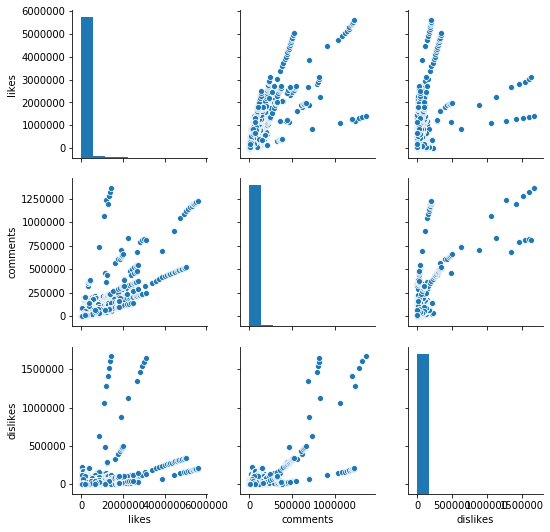

In [45]:
sns.pairplot(df1, vars=['likes', 'comments', 'dislikes']);

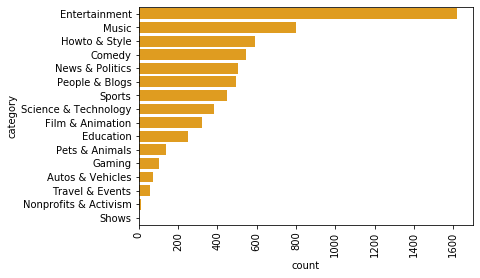

In [46]:
category_order = df2.category.value_counts().index
fig, ax = plt.subplots()
plot = sns.countplot(data=df2, y='category', color='orange', order=category_order)
plt.xticks(rotation=90);

In [47]:
# Calculate the number of days each video was trending into a separate column

# Create separate DataFrames containing the unique videos by minimum and maximum trending date
min_date = df1.loc[df1.groupby('video_id')['trending_date'].idxmin()]
max_date = df1.loc[df1.groupby('video_id')['trending_date'].idxmax()]

/Users/baka_brooks/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


OverflowError: cannot convert float infinity to integer

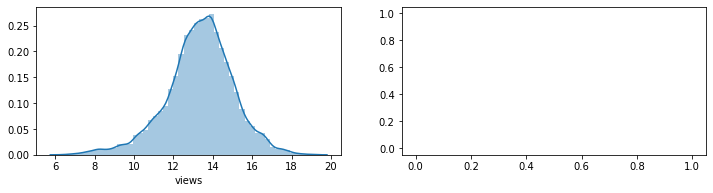

In [48]:
# Converting the quantitative columns to logs to view distributions
log_views = np.log(df1["views"])
log_likes = np.log(df1["likes"])
log_dislikes = np.log(df1["dislikes"])
log_comments = np.log(df1["comments"])

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
ax1 = sns.distplot(log_views)

plt.subplot(2,2,2)
ax2 = sns.distplot(log_likes)

plt.subplot(2,2,3)
# ax3 = sns.distplot(log_dislikes)

plt.subplot(2,2,4)
# ax4 = sns.distplot(log_comments)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9);

<a id='conclusions'></a>
## Conclusions
1. 
2. 
3. 
4. 

### Limitations
...